In [2]:
from keras.datasets import mnist

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


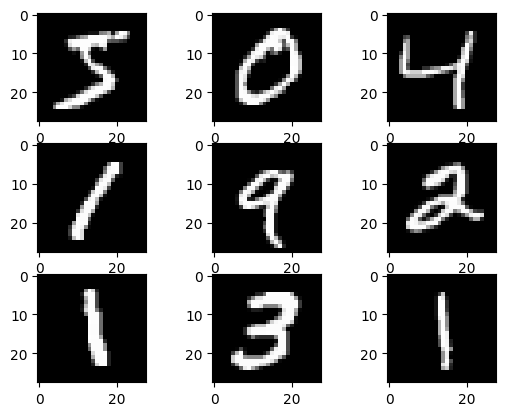

In [10]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 582ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 534ms/step
KNN on pretrained ResNet embeddings (n_train=2000, n_test=500): 0.9200

Classification Report:
              precision    recall  f1-score   support

           0      0.952     0.952     0.952        42
           1      0.957     1.000     0.978        67
           2      0.877     0.909     0.893        55
           3      0.837     0.800     0.818        45
           4      0.926     0.909     0.917        55
           5      0.849     0.900     0.874        50
           6      0.932     0.953     0.943        43
           7      0.918     0.918     0.918        49
           8      1.000     0.950     0.974        40
           9      0.960     0.889     0.923        54

    accuracy                          0.920       500
   macro avg      0.921     0.918     0.919       500
weighted avg      0.921     0.920     0.920       500



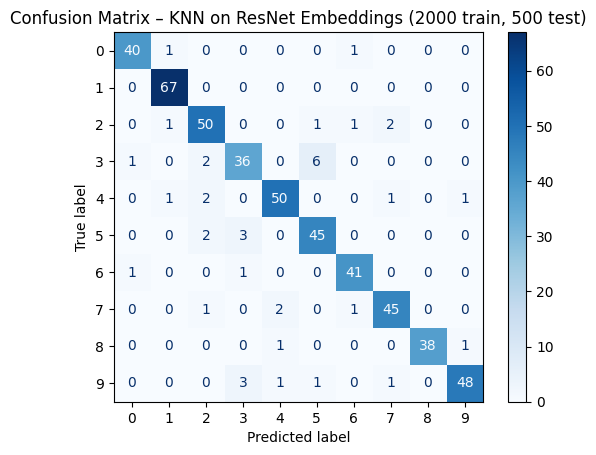

In [15]:
from keras.datasets import mnist
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# --- SUBSAMPLE for speed ---
n_train = 2000
n_test = 500

train_X = train_X[:n_train]
train_y = train_y[:n_train]
test_X = test_X[:n_test]
test_y = test_y[:n_test]

# Convert grayscale 28x28 → RGB 224x224x3
train_X_rgb = np.repeat(train_X[..., np.newaxis], 3, -1)
test_X_rgb = np.repeat(test_X[..., np.newaxis], 3, -1)
train_X_resized = tf.image.resize(train_X_rgb, (224, 224)).numpy()
test_X_resized = tf.image.resize(test_X_rgb, (224, 224)).numpy()

# Preprocess for ResNet
train_X_resized = preprocess_input(train_X_resized)
test_X_resized = preprocess_input(test_X_resized)

# Load pretrained ResNet (without top classifier)
resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Extract embeddings
train_embeddings = resnet.predict(train_X_resized, verbose=1)
test_embeddings = resnet.predict(test_X_resized, verbose=1)

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(train_embeddings, train_y)

y_pred = knn.predict(test_embeddings)
acc = accuracy_score(test_y, y_pred)
print(f"KNN on pretrained ResNet embeddings (n_train={n_train}, n_test={n_test}): {acc:.4f}")

# Precision, Recall, F1 report
report = classification_report(test_y, y_pred, digits=3)
print("\nClassification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix – KNN on ResNet Embeddings ({n_train} train, {n_test} test)")
plt.show()


SVM on pretrained ResNet embeddings (n_train=2000, n_test=500): 0.9340

Classification Report:
              precision    recall  f1-score   support

           0      0.952     0.952     0.952        42
           1      0.985     1.000     0.993        67
           2      0.875     0.891     0.883        55
           3      0.950     0.844     0.894        45
           4      0.946     0.964     0.955        55
           5      0.849     0.900     0.874        50
           6      0.976     0.930     0.952        43
           7      0.902     0.939     0.920        49
           8      0.976     1.000     0.988        40
           9      0.942     0.907     0.925        54

    accuracy                          0.934       500
   macro avg      0.935     0.933     0.934       500
weighted avg      0.935     0.934     0.934       500



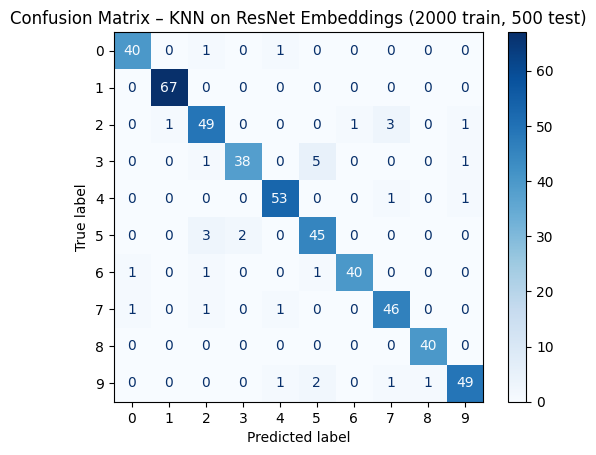

In [16]:
from sklearn.svm import SVC

# SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can tweak C and kernel
svm.fit(train_embeddings, train_y)

y_pred = svm.predict(test_embeddings)
acc = accuracy_score(test_y, y_pred)
print(f"SVM on pretrained ResNet embeddings (n_train={n_train}, n_test={n_test}): {acc:.4f}")

# Precision, Recall, F1 report
report = classification_report(test_y, y_pred, digits=3)
print("\nClassification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix – KNN on ResNet Embeddings ({n_train} train, {n_test} test)")
plt.show()

Epoch 1/10


/Users/fnanni/Projects/bioimage-classification/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9420 - loss: 0.1841 

MLP on ResNet embeddings accuracy: 0.9420
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

           0      0.933     1.000     0.966        42
           1      0.957     1.000     0.978        67
           2      0.980     0.909     0.943        55
           3      0.977     0.933     0.955        45
           4      0.981     0.945     0.963        55
           5      0.923     0.960     0.941        50
           6      1.000     0.884     0.938        43
           7      0.920     0.939     0.929        49
           8      0.784     1.000     0.879        40
           9      0.979     0.852     0.911        54

    accuracy                          0.942       500
   macro avg      0.943     0.942     0.940       500
weighted avg   

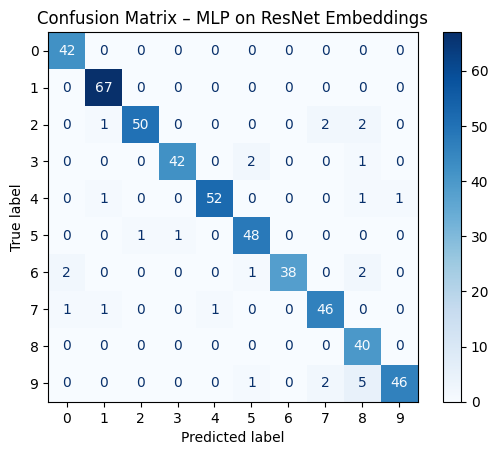

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert labels to one-hot
train_y_cat = to_categorical(train_y, 10)
test_y_cat = to_categorical(test_y, 10)

# Define a simple MLP
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(train_embeddings.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = mlp.fit(train_embeddings, train_y_cat,
                  validation_split=0.1,
                  epochs=10,
                  batch_size=64,
                  verbose='no')

# Evaluate
test_loss, test_acc = mlp.evaluate(test_embeddings, test_y_cat)
print(f"\nMLP on ResNet embeddings accuracy: {test_acc:.4f}")

# Predictions
y_pred = mlp.predict(test_embeddings).argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(test_y, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – MLP on ResNet Embeddings")
plt.show()
